
## Parcial 1 - Curso aprendizaje de máquina
## Maestría en ing. eléctrica - doctorado en ingeniería
## Universidad Tecnológica de Pereira - 2019-1

Prof. Andrés Marino Álvarez Meza, Ph.D.

**Instrucciones**: Teniendo en cuenta las etapas principales de un sistema de aprendizaje de máquina:

## Etapas principales en un sistema de aprendizaje de máquina

1. Observar el problema (ayuda interdisciplinar)
2. Obtener los datos
3. Análisis exploratorio incial (visualizar los datos y estadística descriptiva básica)
4. Preparar los datos para los algoritmos de aprendizaje de máquina (evaluación, preproceso, caracterización, aprendizaje)
5. Seleccionar un modelo y entrenar
6. Sintonizar el modelo escogido
7. Presentar la solución
8. Lanzar la solución, monitorear y mantener el sistema de aprendizaje de máquina.

Descargue la base de datos [FIFA 19 complete player dataset](https://www.kaggle.com/karangadiya/fifa19) y presente un sistema de aprendizaje de máquina que permita estimar la variable **release clause** siguiendo los pasos descritos anteriormente. Presente su solución en un cuaderno jupyter sobre Python 3 (por favor definir el nombre del cuaderno solución como Parcial1_ApMaq_UTP20191_NombreEstudiante.ipynb).

Fecha máxima de entrega viernes 7 de junio de 2019, via correo electrónico a amalvarezme@unal.edu.co

Saludos!

# Análisis Exploratorio y Aprendizaje de Máquina  en FIFA 19


![alt-text-1](https://wallpapercave.com/wp/wp3714377.jpg)

<h2 align="right">FIFA eWorld Cup 2019 - FIFA.com</h2> 


# Problema a resolver

FIFA 19 es un videojuego de simulación de fútbol desarrollado por EA Vancouver como parte de la serie FIFA de Electronic Arts.  en este tutorial modo parcial se presentaran una serie de pasos que permitirán entender y visualizar los datos de modo que la compresión del problema a tratar sea clara y consista es decir ya que se  tiene como objetivo presente un sistema de aprendizaje de máquina que permita estimar la variable release clause siguiendo los pasos definidos con anterioridad

release clause . Algunos jugadores tendrán una cláusula de liberación . Esto es como una carta de triunfo que le permite pasar por alto al equipo de ventas e ir directamente a contratar negociaciones con el jugador, siempre que esté dispuesto a pagarlo.

El conjunto de datos contiene información de todos los 18207 jugadores de la última edición de FIFA 19. Hay 89 atributos que incluyen información personal como edad, nombre, nacionalidad, foto, club, salario, etc., y también información sobre habilidades del jugador como control de balón, goteo, cruce, acabados, habilidades GK y etc.

Primero, veamos la distribución de los jugadores por su posición de juego preferida, y colóquelos en una comprensión de cómo es probable que un club promedio reúna a su equipo en función de las posiciones de estos jugadores. Algunos hechos son, por supuesto, inmediatamente evidentes: de los más de 18,000 jugadores, los huelguistas son los más comunes, seguidos de cerca por los porteros y los defensas centrales. Todos los equipos necesitan delanteros, al menos un portero y una unidad que pueda cubrir efectivamente el centro y la parte posterior del campo (normalmente, cada club tiene un promedio de 3 porteros, 3-4 delanteros y 2–3 defensas centrales en su equipo) . Más allá de estos tres primeros, el número de jugadores que se especializan en cada posición disminuye. Lo interesante es hacia el final de la tabla, donde tenemos menos de 25 mediocampistas de ataque izquierdo, hacia la derecha o hacia la izquierda. Por lo general, los clubes hacen que los delanteros jueguen en estos ángulos, pero encontrar jugadores que se especialicen en estas posiciones es extremadamente raro. ¿Es esta rareza también una indicación de habilidades excepcionales? Dato curioso: Messi (sí,el Messi) se especializa como un delantero derecho. Otro dato divertido: Eden Hazard juega en el ala izquierda, como un delantero. Por supuesto, la correlación no es causalidad, pero esto hace que te preguntes sobre los diferentes enfoques que siguen los futbolistas


https://github.com/geopy/geopy
conda install -c anaconda seaborn
https://anaconda.org/anaconda/seaborn

# Inicio códigos

**Preparar modulos principales, funciones inline, paths para guardar archivos y figuras:**

In [3]:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import plotly.graph_objs as go
import plotly.offline as py
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "imagesFIFA", CHAPTER_ID)
HOUSING_PATH = "datasets/FIFA_19/"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Descripción de los datos antes de la limpieza

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "data.csv")
    return pd.read_csv(csv_path)

In [5]:
fifa = load_housing_data()
fifa.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


Podemos ver que algunas columnas relacionadas con las habilidades de los jugadores tienen 48 valores perdidos. Así que hubo 48 jugadores que simplemente faltan estos valores. Pero reservaremos a esos jugadores para Q1 y Q2 ya que no faltó ningún valor en las columnas Value_M y Wage_K. Para el tercer trimestre, eliminaremos esas filas de jugadores ya que faltaban demasiados valores para ell

# Análisis exploratorio básico

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Como se pude ver hay espacios vacíos en la variable a estimar

In [7]:
fifa.describe() # estadística básica de las variables

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
# contenido de la base de datos descriptivo
fifa = load_housing_data()
fifa.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


Es evidente que se tienen algunas variables que no aportan significancia al proceso por tal motivo se tendría que efectuar una  depuración , de igual forma la variable a estimar contiene letras y un numero de interés por tal motivo es la primera que se debería a tratar para garantizar que el análisis del sistema de aprendizaje se eficaz


In [9]:
fifa[['Release Clause', 'Wage', 'Value']].head()

,Release Clause,Wage,Value
0,€226.5M,€565K,€110.5M
1,€127.1M,€405K,€77M
2,€228.1M,€290K,€118.5M
3,€138.6M,€260K,€72M
4,€196.4M,€355K,€102M


In [10]:
fifa[['Release Clause', 'Wage', 'Value']].isnull().sum()

Release Clause    1564
Wage                 0
Value                0
dtype: int64

en esta sesión se pude evidenciar la naturalidad de la variable a estimar ya que esta variable contiene parámetros numérica y de tipo carácter, además contiene datos faltantes. por tal motivo para tratar este tipo de variable primero se extrae el número y convierte según los datos suministrados por el carácter por ejemplo €1.1M tenemos dos caracteres uno representa los euros € y el otro los miles M por tal hay que hacer versión del parámetro a miles 

In [11]:
fifa["Nationality"].value_counts() #conteo de los valores en una característica Nationality

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Uzbekistan                 2
Nicaragua                  2
Dominican Republic         2
Hong Kong     

In [12]:
fifa["Club"].value_counts() #conteo de los valores en una característica Nationality

Newcastle United             33
Rayo Vallecano               33
RC Celta                     33
Tottenham Hotspur            33
Real Madrid                  33
Empoli                       33
Eintracht Frankfurt          33
Valencia CF                  33
Arsenal                      33
Liverpool                    33
Fortuna Düsseldorf           33
Everton                      33
AS Monaco                    33
Manchester United            33
TSG 1899 Hoffenheim          33
Southampton                  33
Wolverhampton Wanderers      33
Borussia Dortmund            33
Burnley                      33
Cardiff City                 33
Manchester City              33
FC Barcelona                 33
Chelsea                      33
CD Leganés                   33
Frosinone                    33
Atlético Madrid              33
Hertha BSC                   32
Fulham                       32
Bournemouth                  32
Huddersfield Town            32
                             ..
Brisbane

In [13]:
# Número total de filas y columnas en el conjunto de datos antes de la limpieza 
fifa.shape

(18207, 89)

# Limpieza y preparación de datos.


In [14]:
fifa['Release Clause'] = fifa['Release Clause'] .fillna(value='NaN')# convertilo en un dato NaN

In [15]:
# Función que convierte los datos en el factor de euros
def str2float(euros):
    # Convert M in value column to millions
    if euros[-1] == 'M':
        return float(euros[1:-1])*1000000
    # Convert K in Wage column to thousands
    elif euros[-1] == 'K':
        return float(euros[1:-1])*1000
    elif euros[-1] == 'N':
        return None
    else:
        return float(euros[1:])

# Use lambda function to apply UFD str2float() for each player's market value 

fifa['Release Clause']= fifa['Release Clause'].apply(lambda x: str2float(x) )
fifa["Value"]= fifa['Value'].apply(lambda x: str2float(x) )
fifa["Wage"]= fifa['Wage'].apply(lambda x: str2float(x) )

Para tratar los datos que son faltantes al no poder utilizar una media estadística ya que contienen una variable que no permite ejecutarlo se decide cambiar todo los lo parámetros no nulos por un valor representativo de clase en este caso  precio  y los datos faltantes se dejan vacíos  para posteriores tratamientos 

In [16]:
# Comprobando si hay algún nulo / falta
fifa.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [17]:
# Drop unused columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 
                   'Real Face', 'Loaned From','Joined']

fifa.drop(columns_to_drop, axis=1, inplace=True)

el contenido de la base de dato algunas atributos son relevantes ala hora de evaluar en termino de datos como fotos del jugador y fotos del clup como se pudo ver en los datos nulos hay un atributo que el 93% de ellos son nulos por tal motivo no aporta significancia al proceso 

In [18]:
fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


En cuanto a las habilidades en cada posición contienen un número que  indica, el valor antes de + es el valor verdadero. Sin embargo, a medida que avanza la temporada, los jugadores pueden mejorar. Y si lo hace, mejorará por el valor en el lado derecho del +. Para fines de análisis, puede ignorar los valores en el lado derecho del signo +. <a href="https://www.kaggle.com/karangadiya/fifa19/discussion/83752">[For LS, etc what does 83+2 mean?]</a>





In [19]:
#Función para convertir la calificación de habilidades en cada posición.
def posConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val
    
pos_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in pos_columns:
    fifa[col] = fifa[col].apply(posConverter)

In [20]:
 fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,...,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0


In [21]:
 fifa[['Height', 'Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


Estas dos variables requieren conversión numérica ya que se encuentran en unidades de altura y peso para poder tratarlas

In [22]:
#Función para convertirla en variable numerica 
def height_converter(val):
    if val== 'N':
        return None
    
    else:
        f = val.split("'")[0]
        i = val.split("'")[1]
        h = (int(f) * 30.48) + (int(i)*2.54)
        return h

def weight_converter(val):
    if val== 'N':
        return None
    else:
        w = int(val.split('lbs')[0])
        return w

In [23]:
fifa['Height'] = fifa['Height'] .fillna(value='N')# convertilo en un dato NaN
fifa['Weight'] = fifa['Weight'] .fillna(value='N')# convertilo en un dato NaN

fifa['Height']= fifa['Height'].apply(height_converter)
fifa['Weight']= fifa['Weight'].apply(weight_converter)

In [24]:
fifa[['Height', 'Weight']].head()

,Height,Weight
0,170.18,159.0
1,187.96,183.0
2,175.26,150.0
3,193.04,168.0
4,180.34,154.0


In [25]:
def WorkRateAttack_converter(val):
    if val== 'N':
        return None
    else:
        a = val.split('/')[0]
        return a
    
def WorkRateDefence_converter(val):
    if val== 'N':
        return None
    else:
        d = val.split('/')[1]
        return d

fifa['Work Rate'] = fifa['Work Rate'] .fillna(value='N')# convertilo en un dato NaN
fifa['Work Rate Attack']= fifa['Work Rate'].apply(lambda x: WorkRateAttack_converter(x))
fifa['Work Rate Defence']= fifa['Work Rate'].apply(lambda x: WorkRateDefence_converter(x))

columns_to_drop = ['Work Rate']
fifa.drop(columns_to_drop, axis=1, inplace=True)

In [26]:
fifa.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Work Rate Attack,Work Rate Defence
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,High,Medium
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,Medium,Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,High,High
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,Right,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,High,Medium
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,Right,...,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,High,High
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,Right,...,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0,High,Medium
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,Right,...,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,High,Medium
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,1331,Right,...,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0,Medium,Medium


Saving figure attribute_histogram_plots


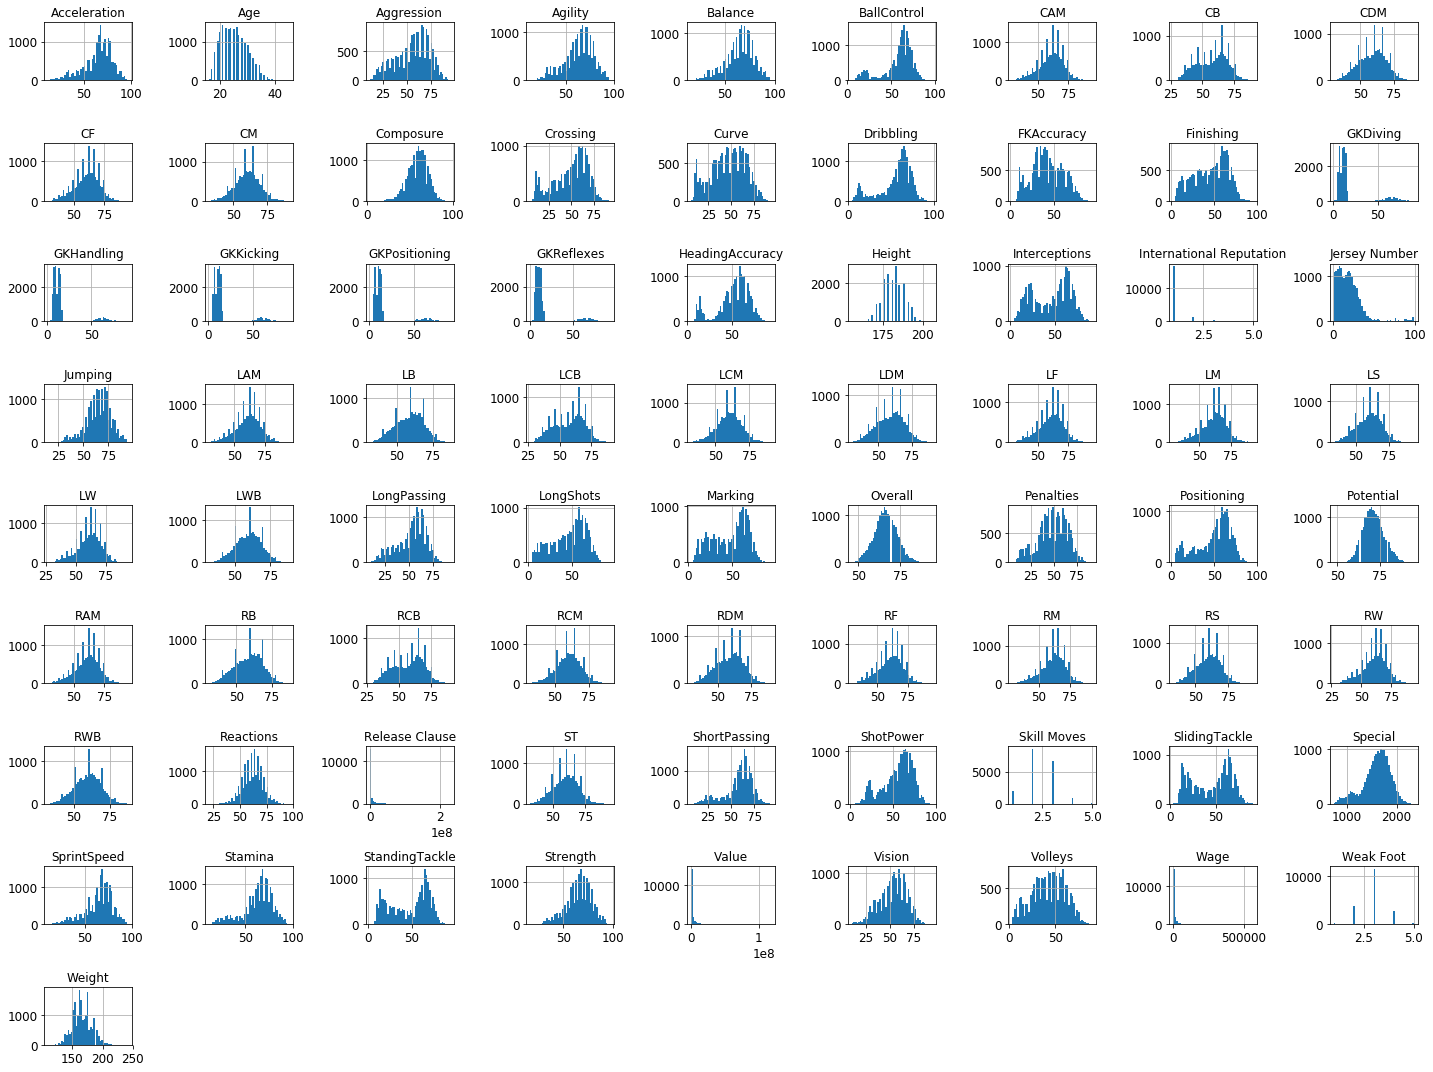

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
fifa.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Análisis exploratorio y visualización sobre datos muestreados 

visualizaciones   de los datos para conocer información  más sobre ellos

## Distribución de jugadores entre países

In [28]:
fifa_nations = fifa.groupby(by='Nationality').size().reset_index()
fifa_nations.columns = ['Nacion', 'N']
fifa_nations=fifa_nations.sort_values(by='N', ascending=False)
fifa_nations2=fifa_nations['Nacion'][1:70]
fifa_nations1=fifa_nations['N'][1:70]

En este caso solo se escogió las primeras 70 naciones ya que estas poseían el mayor numero de jugadores por tal motivo se mapean el número de jugadores por nacional de tal manera que se para ello se usa la biblioteca de geopy.geocoders que permite entregar la latitud y longitud de cada país

Saving figure Nº Players


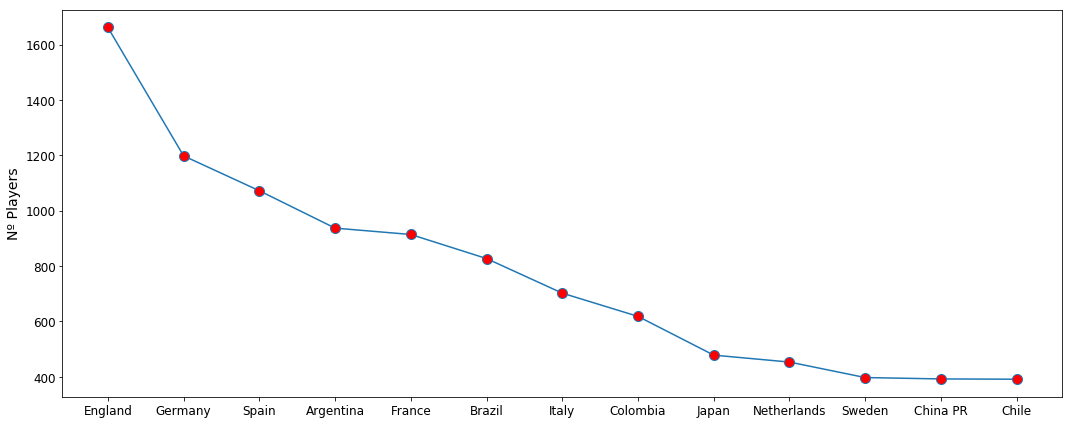

In [29]:
nat=pd.value_counts(fifa["Nationality"])
nat=nat.head(13)
plt.figure(figsize=(15,6))
plt.plot(nat, marker=".", markersize=20, markerfacecolor='red')
plt.ylabel('Nº Players')
save_fig("Nº Players")

In [30]:
def fifa_Nacion_latitude(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "fifa_Nacion_latitude.csv")
    return pd.read_csv(csv_path)
fifa_Nacion_latitude =fifa_Nacion_latitude()


In [31]:
import folium
m = folium.Map(location=[30, 0], zoom_start=2)

for x in range (0,69):
    folium.Marker(
        location=[fifa_Nacion_latitude['latitud'][x],fifa_Nacion_latitude['longitud'][x]],
                  popup = fifa_nations2.iloc[x] +' - aproximadamente'+str(fifa_nations1.iloc[x])).add_to(m)



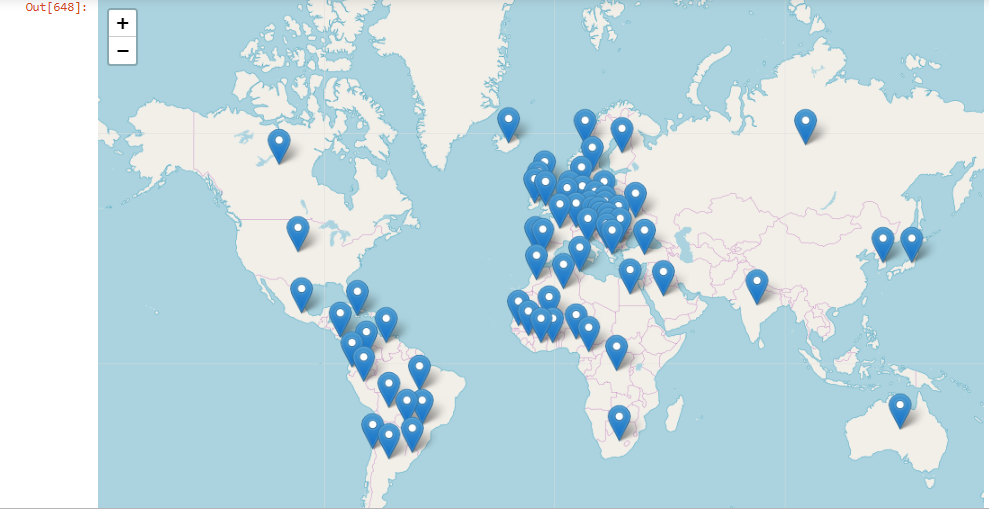

In [32]:
from IPython.display import Image
Image(filename='imagesFIFA\end_to_end_project\mapa2.png')

La mayoría de los jugadores son de países europeos y sudamericanos. 
Los 5 principales países como lo muetra la grafica 
- Engalnd - 1657 
- Alemania - 1195 
- España - 1071 
- Argentina - 936 
- Francia - 911 


Saving figure Age vs  Potential


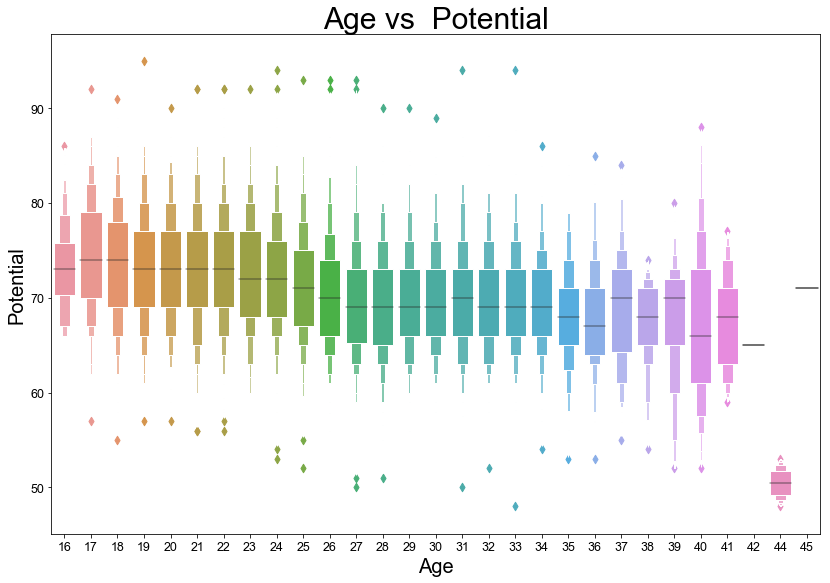

In [33]:
import seaborn as sns

def sns_settings(title='', xtitle='', ytitle='', rotate = 0):
    sns.set(style='dark', palette='muted', color_codes=True)
    ax.axes.set_title(title, fontsize=30)
    ax.set_xlabel(xtitle, fontsize=20)
    ax.set_ylabel(ytitle, fontsize = 20)
    plt.yticks(fontsize='12.5') # ticks are scaling numbers
    plt.xticks(fontsize='12.5')
    a = plt.setp(ax.get_xticklabels(), rotation=rotate)

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas

sns_settings(title = 'Age vs  Potential')
sns.boxenplot(data=fifa, x="Age", y="Potential")
save_fig('Age vs  Potential')


Desde la trama anterior, podemos ver que la mayoría de los jugadores tienen entre 20 y 26 años de edad. Y el número de jugadores comienza a disminuir después de los 26 años y se acelera después de los 30. La razón detrás de esto podría ser que muchos jugadores jóvenes no tuvieron suficientes oportunidades para demostrar su valía y renunciar a su sueño como futbolista. Cuando un jugador de fútbol llega a sus últimos 20 años, ha adquirido suficiente experiencia y alcanza el pico de su calificación. La era dorada de un jugador de fútbol comienza aquí y termina cuando su edad alcanza los 35 años. A esta edad, su condición física disminuye rápidamente, así como la calificación promedio. También hay bastantes números de jugadores con edad mayor de 37 años, 38 años. Esto es una gran sorpresa, especialmente su calificación todavía puede permanecer bastante alta.

Saving figure Top 10 paises y su  potencial jugadores


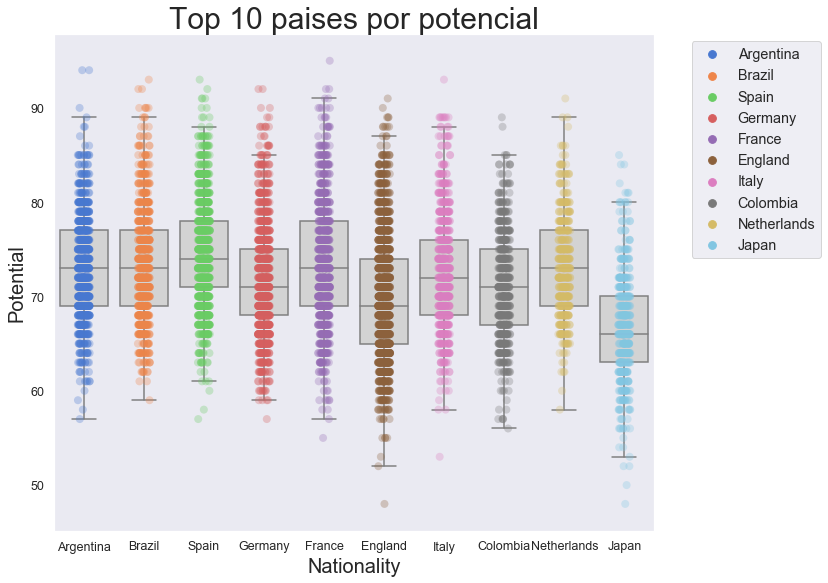

In [34]:
## Data
top10 = list(fifa['Nationality'].value_counts().head(10).index)
df_top10 = fifa.query('Nationality in @top10')

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas
sns_settings(title = 'Top 10 paises por potencial')

# Box
sns.boxplot(data = df_top10, y = 'Potential', x = 'Nationality'
                          , showfliers=False, color='lightgray') # showfliers=False OR , sym='' : remove outliers
# Jitter
sns.stripplot(data=df_top10, x='Nationality', y = 'Potential', jitter = True, hue ='Nationality', size=8, linewidth=0,  alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc = 2, fontsize='large')
save_fig('Top 10 paises y su  potencial jugadores')

In [35]:
df_t10c = fifa[["Name", "Wage", "Club"]]
topclubs = df_t10c.groupby("Club", as_index= False).median().sort_values("Wage", ascending = False).head(10)
topclubs = list(topclubs["Club"])

df_t10c.groupby("Club", as_index= False).median().sort_values("Wage", ascending = False).head(10)

,Club,Wage
212,FC Barcelona,125000.0
326,Juventus,125000.0
374,Manchester City,120000.0
470,Real Madrid,120000.0
375,Manchester United,110000.0
134,Chelsea,98000.0
363,Liverpool,94000.0
214,FC Bayern München,85000.0
52,Arsenal,81000.0
583,Tottenham Hotspur,79000.0


Saving figure Top 10 clubes por salario de jugador


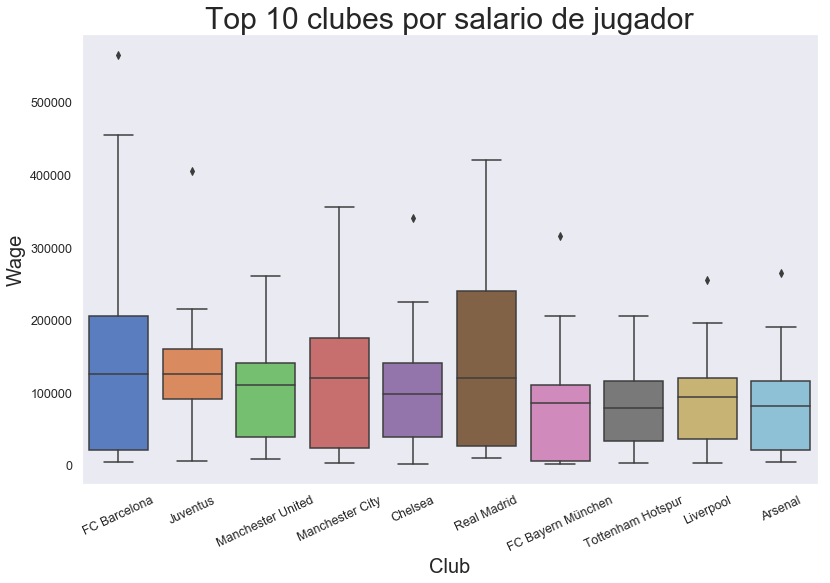

In [36]:
c = fifa.query('Club in @topclubs')

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas
sns_settings(title = "Top 10 clubes por salario de jugador", rotate = 25)

sns.boxplot(data = c, y = 'Wage', x = 'Club')
save_fig('Top 10 clubes por salario de jugador')

# Preparar datos (validación y análisis exploratorio por visualización)

In [37]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fifa, test_size=0.3, random_state=42)


In [38]:
test_set.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Work Rate Attack,Work Rate Defence
5848,J. Huth,24,Germany,69,77,1. FSV Mainz 05,1200000.0,8000.0,1214,Right,...,14.0,11.0,70.0,65.0,74.0,66.0,72.0,2300000.0,Medium,Medium
14634,M. Diallo,27,Senegal,61,61,KAS Eupen,270000.0,2000.0,1424,Right,...,16.0,19.0,12.0,10.0,11.0,13.0,13.0,405000.0,High,Medium
11807,E. Mastrolía,27,Argentina,64,68,Club Atlético Talleres,400000.0,3000.0,1083,Left,...,13.0,15.0,64.0,60.0,61.0,69.0,63.0,630000.0,Medium,Medium
5826,J. Hegeler,30,Germany,69,69,Bristol City,775000.0,18000.0,1832,Right,...,72.0,67.0,13.0,15.0,11.0,14.0,8.0,1500000.0,Low,Medium
1989,K. Stöger,24,Austria,75,80,Fortuna Düsseldorf,9000000.0,24000.0,1824,Left,...,29.0,35.0,15.0,12.0,13.0,10.0,12.0,16900000.0,Medium,Medium


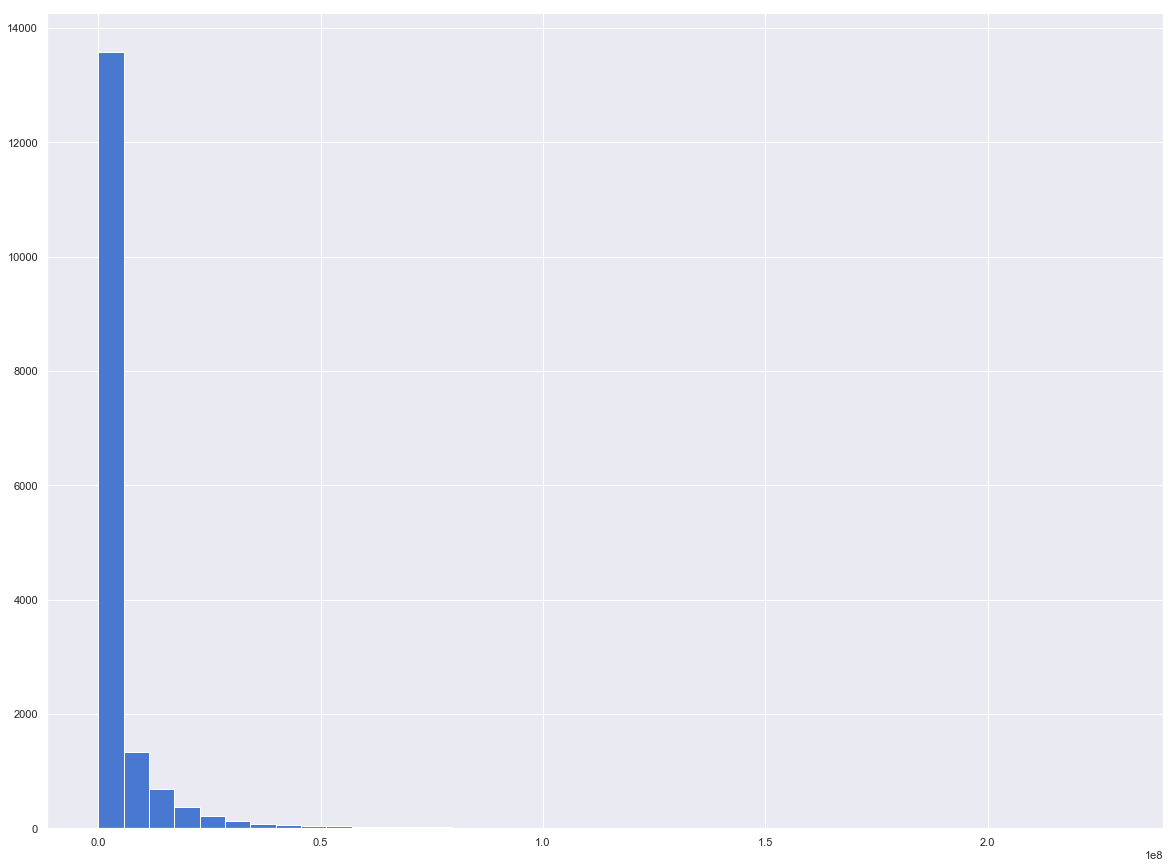

In [39]:
fifa["Release Clause"].hist(bins=40, figsize=(20,15))


Si lo vemos detenidamente la mayoría de jugadores tiene un precio elevado por  Cláusula de liberación al ver la distribución exponencial si estratificáramos con respecto a esta variable podía quedar desbalanceada por tal motivo se escoge el potencial del jugador para estratificar

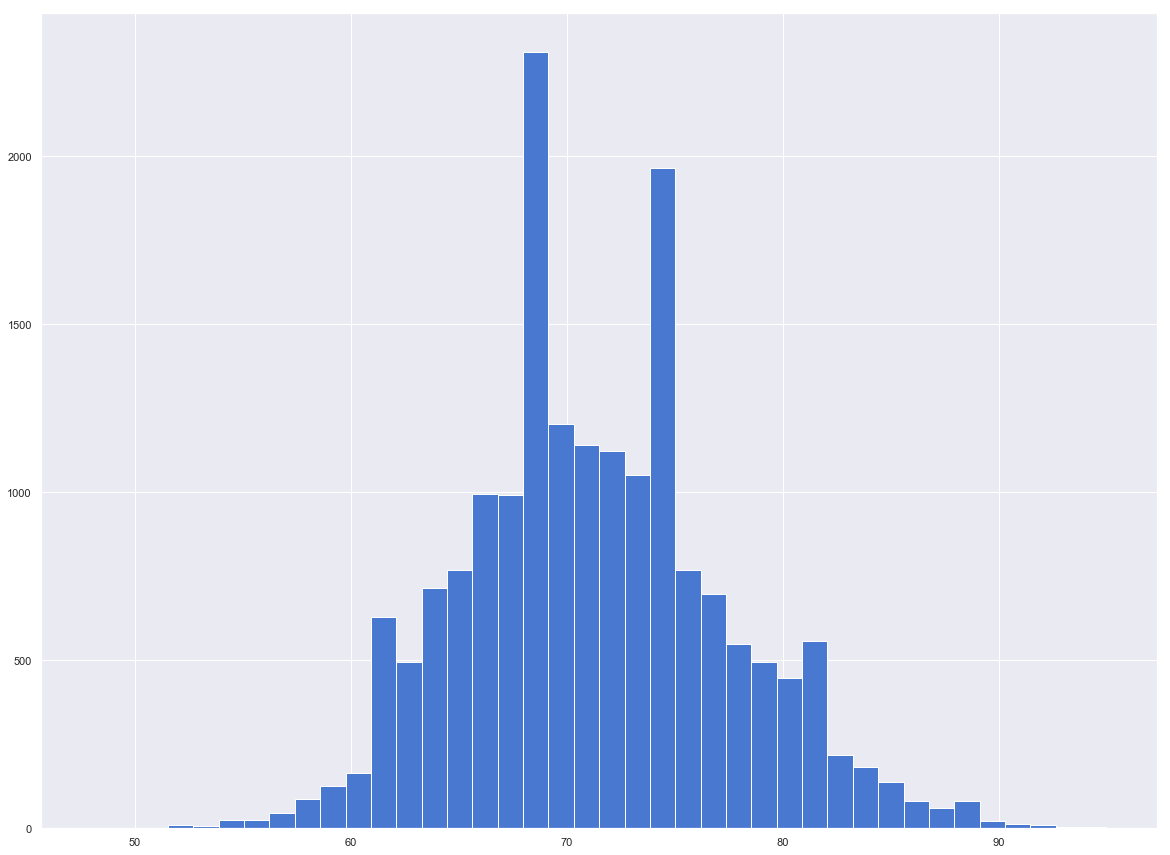

In [40]:
fifa["Potential"].hist(bins=40, figsize=(20,15))

In [41]:
fifa["income_cat"] = pd.cut(fifa["Potential"],
                            bins=[0,67,70,75,78., np.inf],
                            labels=[1, 2, 3, 4,5])


In [42]:
fifa["income_cat"].value_counts()

3    5279
1    5089
2    3514
5    2311
4    2014
Name: income_cat, dtype: int64

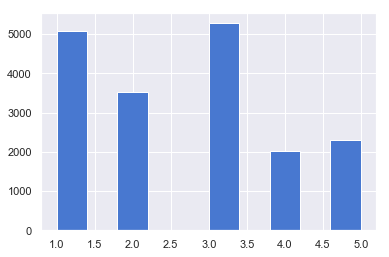

In [43]:
fifa["income_cat"].hist()

Muestreo estratificado de datos: asegurar mismas proporciones en las particiones de datos con base a característica de interés

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(fifa, fifa["income_cat"].values):
    strat_train_set = fifa.loc[train_index]
    strat_test_set = fifa.loc[test_index]

In [45]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.289942
1    0.279506
2    0.192997
5    0.126948
4    0.110608
Name: income_cat, dtype: float64

In [46]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.289951
1    0.279517
2    0.193026
5    0.126853
4    0.110653
Name: income_cat, dtype: float64

In [47]:
fifa["income_cat"].value_counts() / len(fifa)

3    0.289943
1    0.279508
2    0.193003
5    0.126929
4    0.110617
Name: income_cat, dtype: float64

In [48]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(fifa, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(fifa),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [49]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.279508,0.279517,0.273202,-2.256231,0.003173
2,0.193003,0.193026,0.192202,-0.414815,0.011978
3,0.289943,0.289951,0.307249,5.968522,0.002465
4,0.110617,0.110653,0.104887,-5.179477,0.033170
5,0.126929,0.126853,0.122460,-3.520873,-0.059739


In [50]:
for set_ in (strat_train_set, strat_test_set,fifa): #remove rows or columns
    set_.drop("income_cat", axis=1, inplace=True)
    

# Identificación de correlaciones

In [51]:
corr_matrix = fifa.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

Saving figure corr_matrix


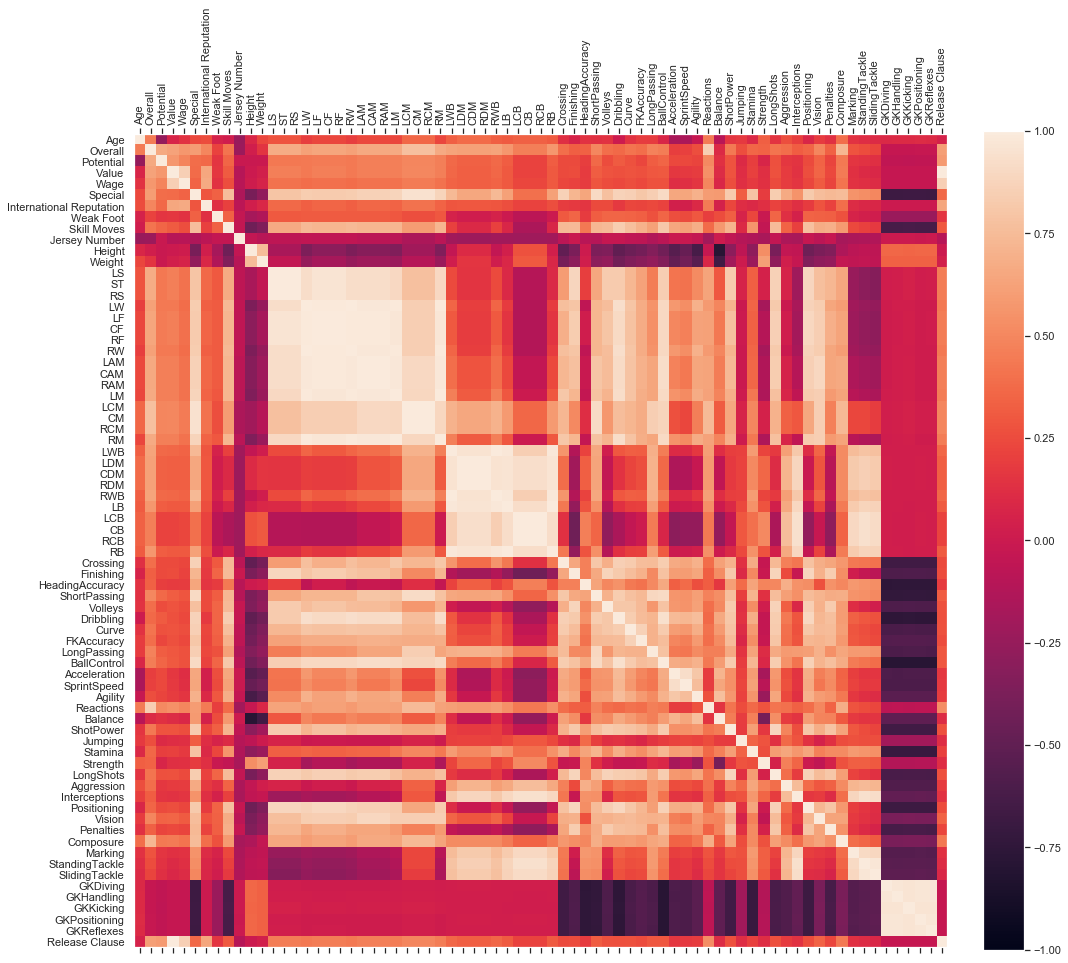

In [52]:
def plotCorrMatrix(correlations, fig, subplot=111):
    names = list(correlations.columns);
    ax = fig.add_subplot(subplot);
    cax = ax.matshow(correlations, vmin=-1, vmax=1);
    fig.colorbar(cax, fraction=0.046, pad=0.04); #alignment
    ticks = np.arange(0,len(names));
    ax.set_xticks(ticks);
    ax.set_yticks(ticks);
    ax.set_xticklabels(names, rotation='vertical');
    ax.set_yticklabels(names);

plotCorrMatrix(corr_matrix , plt.figure(figsize=(15,15)));
save_fig('corr_matrix')


Hay algunas regiones fuertemente correlacionadas negativamente, veamos por qué. 

In [53]:
corr_matrix["Release Clause"].sort_values(ascending=False)

Release Clause              1.000000
Value                       0.994352
Wage                        0.855922
International Reputation    0.641156
Overall                     0.616422
Potential                   0.586751
Reactions                   0.532099
LCM                         0.494826
CM                          0.494826
RCM                         0.494826
RAM                         0.461234
CAM                         0.461234
LAM                         0.461234
RM                          0.460453
LM                          0.460453
LS                          0.455987
ST                          0.455987
RS                          0.455987
RF                          0.454577
LF                          0.454577
CF                          0.454577
Composure                   0.441679
RW                          0.437909
LW                          0.437909
Special                     0.369321
RWB                         0.363210
LWB                         0.363210
V

Saving figure scatter_matrix_plot


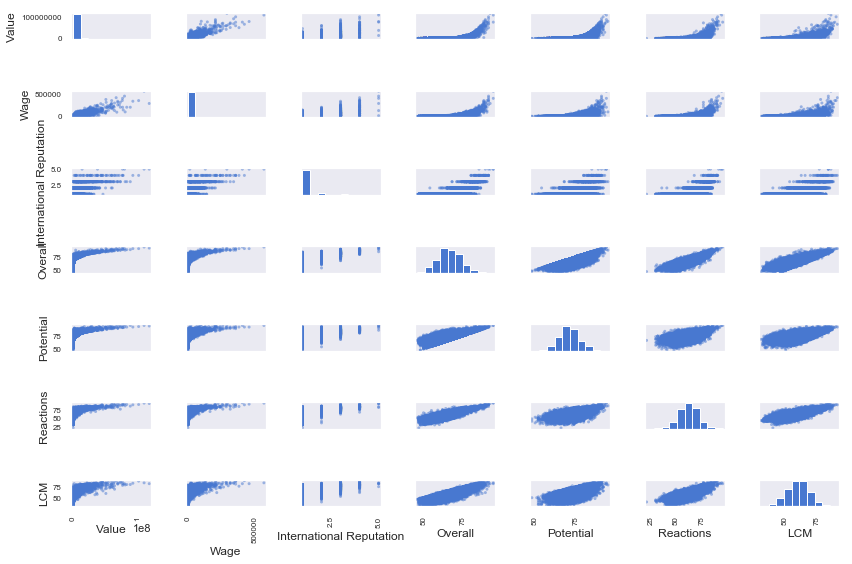

In [54]:
from pandas.plotting import scatter_matrix

attributes = ["Value", "Wage", "International Reputation",
              "Overall","Potential","Reactions",'LCM']
scatter_matrix(fifa[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

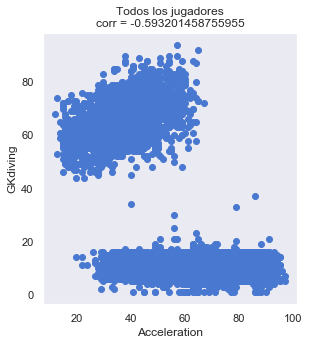

In [55]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title('Todos los jugadores\ncorr = {}'.format(fifa['Acceleration'].corr(fifa['GKReflexes'])));
plt.scatter(fifa['Acceleration'], fifa['GKReflexes']);
plt.xlabel('Acceleration');
plt.ylabel('GKdiving');


Este es un ejemplo de la paradoja de Simpson. Tenemos una correlación positiva para un grupo (porteros), casi ninguna correlación para otros, y los datos de los resultados parecen estar correlacionados negativamente.

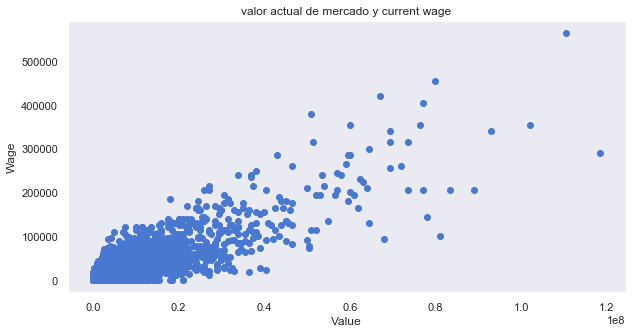

In [56]:
plt.figure(figsize=(10, 5));
plt.title('valor actual de mercado y current wage');
plt.scatter(fifa['Value'],fifa['Wage']);
plt.xlabel('Value');
plt.ylabel('Wage');


Text(0, 0.5, 'GKDiving')

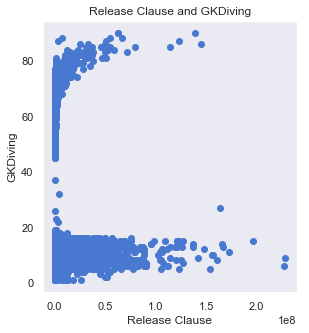

In [57]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title("Release Clause and GKDiving")
plt.scatter(fifa['Release Clause'], fifa['GKDiving'])
plt.xlabel('Release Clause')
plt.ylabel('GKDiving')


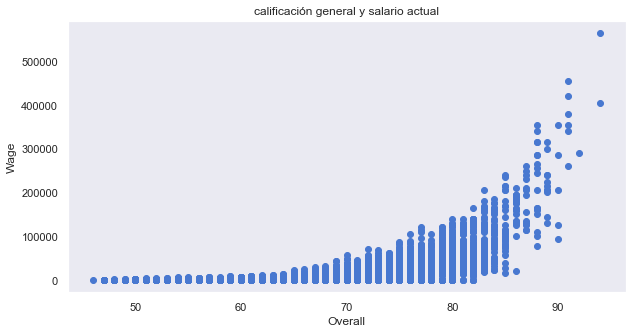

In [58]:
plt.figure(figsize=(10, 5));
plt.title('calificación general y salario actual');
plt.scatter(fifa[ "Overall"],fifa['Wage']);
plt.xlabel( "Overall");
plt.ylabel('Wage');

Al observar que en una sesión se centran los datos de tal manera podemos intuir   que hay una gran cantidad de jugadores mal pagados (algunos jugadores con una calificación de más de 80 obtienen el salario mínimo, mientras que con una tendencia exponencial, tienen que pagar 100 veces más).

## Generar nuevas características intuitivas

In [59]:
fifa["Acceleration_per_GKDiving"] = fifa['Acceleration']+fifa['GKDiving']
fifa["Acceleration_per_GKHandling"] = fifa["Acceleration"]+fifa["GKHandling"]
fifa["Acceleration_per_GKPositioning"]=fifa["Acceleration"]+fifa["GKPositioning"]
fifa["Acceleration_per_GKReflexes"]=fifa["Acceleration"]+fifa["GKReflexes"]
fifa["Acceleration_per_GKKicking "]=fifa["Acceleration"]+fifa["GKKicking"]

corr_matrix = fifa.corr()
corr_matrix["Release Clause"].sort_values(ascending=False)

Release Clause                    1.000000
Value                             0.994352
Wage                              0.855922
International Reputation          0.641156
Overall                           0.616422
Potential                         0.586751
Reactions                         0.532099
CM                                0.494826
LCM                               0.494826
RCM                               0.494826
LAM                               0.461234
RAM                               0.461234
CAM                               0.461234
RM                                0.460453
LM                                0.460453
ST                                0.455987
RS                                0.455987
LS                                0.455987
CF                                0.454577
RF                                0.454577
LF                                0.454577
Composure                         0.441679
RW                                0.437909
LW         

Text(0, 0.5, 'Acceleration_per_GKDiving')

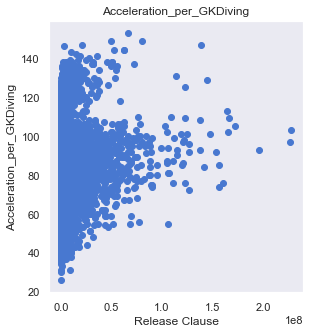

In [60]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title("Acceleration_per_GKDiving")
plt.scatter(fifa['Release Clause'], fifa['Acceleration_per_GKDiving'])
plt.xlabel('Release Clause')
plt.ylabel('Acceleration_per_GKDiving')

In [61]:
fifa.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Acceleration_per_GKDiving,Acceleration_per_GKHandling,Acceleration_per_GKPositioning,Acceleration_per_GKReflexes,Acceleration_per_GKKicking
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,1.664300e+04,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,1597.809908,1.113222,2.947299,2.361308,19.546096,...,16.391596,16.232061,16.388898,16.710887,4.585061e+06,81.230299,81.005672,81.002974,81.324963,80.846137
std,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,272.586016,0.394031,0.660456,0.756164,15.947765,...,16.906900,16.502864,17.034669,17.955119,1.111872e+07,14.922307,14.436560,14.555638,15.074258,14.263264
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.300000e+04,26.000000,28.000000,30.000000,31.000000,32.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,5.250000e+05,73.000000,73.000000,73.000000,73.000000,73.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,11.000000,11.000000,11.000000,11.000000,1.100000e+06,81.000000,81.000000,81.000000,81.000000,81.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,14.000000,14.000000,14.000000,14.000000,3.500000e+06,89.000000,89.000000,89.000000,89.000000,89.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,91.000000,90.000000,94.000000,2.281000e+08,153.000000,149.000000,148.000000,157.000000,155.000000


# Preparar los datos para los algoritmos de aprendizaje de máquina

In [62]:
fifa = strat_train_set.drop("Release Clause", axis=1) # drop labels for training set
fifa_labels = strat_train_set["Release Clause"].copy()

In [63]:
sample_incomplete_rows = fifa[fifa.isnull().any(axis=1)].head()
sample_incomplete_rows

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Work Rate Attack,Work Rate Defence
3293,M. Flekken,25,Netherlands,72,75,SC Freiburg,2800000.0,12000.0,1079,Right,...,15.0,13.0,20.0,72.0,71.0,66.0,70.0,74.0,Medium,Medium
6818,R. M'Bolhi,32,Algeria,68,68,Ettifaq FC,525000.0,8000.0,1202,Right,...,11.0,13.0,10.0,70.0,63.0,62.0,62.0,76.0,Medium,Medium
722,R. Adler,33,Germany,79,79,1. FSV Mainz 05,6500000.0,25000.0,1155,Right,...,9.0,12.0,13.0,78.0,77.0,70.0,81.0,79.0,Medium,Medium
16487,J. Meneses,34,Colombia,57,57,América de Cali,40000.0,1000.0,886,Right,...,22.0,13.0,14.0,56.0,60.0,57.0,58.0,58.0,Medium,Medium
13850,M. Siabanis,18,Greece,62,73,PAOK,375000.0,1000.0,1063,Left,...,17.0,21.0,22.0,63.0,58.0,59.0,60.0,67.0,Medium,Medium


#  lidiar con datos perdidos
Se estiman los valores perdidos mediante mediana, promedio, moda, o estimaciones por vecindario.

In [64]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer


Se deben remover las variables nominales para aplicar la opción por mediana:


In [65]:
# Drop unused columns
columns_to_drop = ['Name', 'Nationality', 'Club', 'Preferred Foot','Work Rate Attack', 
                   'Work Rate Defence', 'Contract Valid Until','Position','Body Type']

fifa_num = fifa.drop(columns_to_drop, axis=1)

**Let's create a custom transformer to add extra attributes:**

In [66]:

from sklearn.preprocessing import FunctionTransformer

Acceleration_ix, GKDiving_ix, GKHandling_ix, GKPositioning_ix,GKReflexes_ix, GKKicking_ix,= [
    list(fifa_num.columns).index(col)
    for col in ('Acceleration', 'GKDiving', "GKHandling", "GKPositioning","GKReflexes","GKKicking")]


def add_extra_features(X):
    Acceleration_per_GKDiving = X[:, Acceleration_ix] + X[:, GKDiving_ix]
    Acceleration_per_GKHandling = X[:, Acceleration_ix] + X[:, GKHandling_ix]
    Acceleration_per_GKPositioning = X[:, Acceleration_ix] + X[:, GKPositioning_ix]
    Acceleration_per_GKReflexes = X[:, Acceleration_ix] + X[:, GKReflexes_ix]
    Acceleration_per_GKKicking = X[:, Acceleration_ix] + X[:, GKKicking_ix]
    return np.c_[X, Acceleration_per_GKDiving ,Acceleration_per_GKHandling,Acceleration_per_GKPositioning,Acceleration_per_GKReflexes,Acceleration_per_GKKicking ]

attr_adder = FunctionTransformer(add_extra_features, validate=False,)
housing_extra_attribs = attr_adder.fit_transform(fifa_num.values)

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(fifa_num.columns)+["Acceleration_per_GKDiving", "Acceleration_per_GKHandling","Acceleration_per_GKPositioning","Acceleration_per_GKReflexes",'Acceleration_per_GKKicking'])

housing_extra_attribs.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Acceleration_per_GKDiving,Acceleration_per_GKHandling,Acceleration_per_GKPositioning,Acceleration_per_GKReflexes,Acceleration_per_GKKicking
0,21.0,65.0,75.0,875000.0,10000.0,1620.0,1.0,4.0,3.0,19.0,...,7.0,13.0,15.0,12.0,8.0,87.0,93.0,92.0,88.0,95.0
1,25.0,72.0,75.0,2800000.0,12000.0,1079.0,1.0,4.0,1.0,26.0,...,72.0,71.0,66.0,70.0,74.0,100.0,99.0,98.0,102.0,94.0
2,26.0,60.0,60.0,220000.0,3000.0,1607.0,1.0,2.0,2.0,27.0,...,15.0,15.0,11.0,7.0,6.0,87.0,87.0,79.0,78.0,83.0
3,32.0,65.0,65.0,400000.0,3000.0,1806.0,1.0,3.0,3.0,22.0,...,6.0,9.0,10.0,10.0,15.0,74.0,77.0,78.0,83.0,78.0
4,27.0,78.0,79.0,12000000.0,41000.0,1774.0,2.0,4.0,3.0,91.0,...,9.0,9.0,8.0,6.0,8.0,77.0,77.0,74.0,76.0,76.0


#  variables nominales 

1. Etiquetar (codificar) los textos. Problemas: la noción de cercanía pierde sentido
2. One-hot-encoding, una nueva característica binaria se genera por cada categoría de la variable de interés. Problema: el número de características crece considerablemente.

In [67]:
Club_cat = fifa[['Club']]
Club_cat.head(10)

,Club
10570,Mansfield Town
3293,SC Freiburg
14906,Al Taawoun
10890,Crawley Town
782,Atalanta
6954,SSV Jahn Regensburg
6818,Ettifaq FC
722,1. FSV Mainz 05
16487,América de Cali
13850,PAOK


In [68]:
Club_cat = fifa[['Position']]
Club_cat.head(10)

,Position
10570,RS
3293,GK
14906,RM
10890,LCM
782,RS
6954,RB
6818,GK
722,GK
16487,GK
13850,GK


La tasa de trabajo está en el formato de la tasa de trabajo de ataque / la tasa de trabajo de defensa , por lo que debe crear dos nuevas columnas aquí.

In [69]:
Club_cat = fifa[['Work Rate Attack']]
Club_cat.head(10)

,Work Rate Attack
10570,High
3293,Medium
14906,Medium
10890,Medium
782,Medium
6954,Medium
6818,Medium
722,Medium
16487,Medium
13850,Medium


In [70]:
Club_cat = fifa[['Work Rate Defence']]
Club_cat.head(10)

,Work Rate Defence
10570,Medium
3293,Medium
14906,Medium
10890,Medium
782,Medium
6954,Medium
6818,Medium
722,Medium
16487,Medium
13850,Medium


In [71]:
fifa.to_csv('fifa19_data_nuw.csv', header=False, index=False)

# Esquema general (pipeline) de preproceso para atributos numéricos

1. Lidiar con datos perdidos -> SimpleImputer
2. Añadir nuevos atributos desde conocimiento a priori (equipo interdisciplinar) -> FunctionTransformer
3. Escalado de atributos (min max ; estandarización - zscore). Min-max sensible a atípicos  

In [72]:
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan,strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()), #MinMaxScaler StandardScaler
    ])

fifa_num_tr = num_pipeline.fit_transform(fifa_num)

median =fifa_labels.median()
fifa_labels.fillna(median, inplace=True) # optio

In [73]:
fifa_labels=stats.zscore(fifa_labels)

# Seleccionar un modelo y entrenar sobre los datos preparados

La metodología de entrenamiento, validación y test nos permite aislar las relaciones aleatorias entre variables. Imaginemos que algún desequilibrado introduce en una máquina letra a letra el antiguo testamento en hebreo, tendremos un gran número de parámetros para un modelo y de forma aleatoria se pueden producir estructuras sintácticas debidas al azar. Si alguien detecta estas estructuras sintácticas, se inventa un código secreto y escribe un libro se puede hinchar a venderlo. Sin embargo aquellos que leen estas líneas no lo comprarán porque son conscientes del problema que supone tener un modelo con muchas variables y muchos parámetros

# Regresión lineal

La regresión lineal es una técnica de análisis predictivo básica que utiliza datos históricos para predecir una variable de salida

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

lin_reg = LinearRegression()
lin_reg.fit(fifa_num_tr, fifa_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Entrenar sobre un subconjunto de datos y verificacion que el modelo no se este sobreajustando: i) necesitamos más datos? ii) un modelo más simple? iii) restringirlo (regularizarlo)?:

In [75]:
from sklearn.model_selection import cross_val_score

scoreslin_reg = cross_val_score(lin_reg, fifa_num_tr, fifa_labels,
                         scoring="neg_mean_squared_error", cv=5) #scikitlearn trabaja con función util (mayor mejor) no función de costo (menor mejor)
tree_rmse_scores_lin_reg = np.sqrt(-scoreslin_reg)

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores_lin_reg)

Scores: [0.32031702 0.18153024 0.22435277 0.21768542 0.21308587]
Mean: 0.23139426449913564
Standard deviation: 0.04683244482216384


De forma visual veamos los parámetros

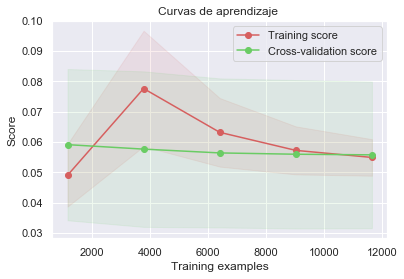

In [77]:
title = "Curvas de aprendizaje "
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")

#Validación cruzada para pintar las curvas de entrenamiento y validación e incertidumbre   
train_sizes_lin_reg, train_scores_lin_reg, test_scores_lin_reg= \
    learning_curve(lin_reg, fifa_num_tr, fifa_labels,
                   scoring="neg_mean_squared_error", cv=5)

train_scores_mean_lin_reg= abs(np.mean(train_scores_lin_reg, axis=1))
train_scores_std_lin_reg = abs(np.std(train_scores_lin_reg, axis=1))
test_scores_mean_lin_reg =abs( np.mean(test_scores_lin_reg, axis=1))
test_scores_std_lin_reg =abs( np.std(test_scores_lin_reg, axis=1))


plt.grid()
plt.fill_between(train_sizes_lin_reg, train_scores_mean_lin_reg - train_scores_std_lin_reg,
                 train_scores_mean_lin_reg + train_scores_std_lin_reg, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_lin_reg, test_scores_mean_lin_reg - test_scores_std_lin_reg,
                 test_scores_mean_lin_reg + test_scores_std_lin_reg, alpha=0.1, color="g")

plt.plot(train_sizes_lin_reg, train_scores_mean_lin_reg, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_lin_reg, test_scores_mean_lin_reg, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

# Regresión de Ridge 

Regresión de Ridge La regresión lineal regular tiene la forma de: J (theta) = MSE (theta) La regresión de Ridge aplica un término de regularización proporcional al cuadrado de la norma l2 de los pesos de las características (sin incluir la intersección). 

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid_ridgeReg={ "alpha": [0.0000001, 50,200,600, 1000]}

ridgeReg = Ridge(alpha=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_ridgeReg = GridSearchCV(ridgeReg, param_grid_ridgeReg, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_ridgeReg.fit(fifa_num_tr, fifa_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-07, 50, 200, 600, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Text(0, 0.5, 'Score')

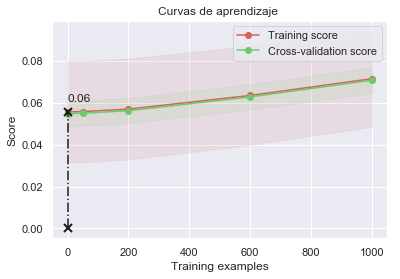

In [79]:
cvres_ridgeReg = grid_search_ridgeReg.cv_results_    
testscores_mean_ridgeReg =abs(cvres_ridgeReg["mean_test_score"])
testscores_sd_ridgeReg = abs(cvres_ridgeReg['std_test_score'])

trainscores_mean_ridgeReg =abs(cvres_ridgeReg['mean_train_score'])
trainscores_sd_ridgeReg = abs(cvres_ridgeReg[ 'std_train_score'])



X_axis_ridgeReg = np.array(cvres_ridgeReg['param_alpha'].data, dtype=float)
plt.fill_between(X_axis_ridgeReg, testscores_mean_ridgeReg - testscores_sd_ridgeReg,
                        testscores_mean_ridgeReg + testscores_sd_ridgeReg,alpha=0.1,color="r")    
plt.plot(X_axis_ridgeReg, testscores_mean_ridgeReg, 'o-', color="r",
         label="Training score")

plt.fill_between(X_axis_ridgeReg, trainscores_mean_ridgeReg - trainscores_sd_ridgeReg,
                 trainscores_mean_ridgeReg + trainscores_sd_ridgeReg, alpha=0.1, color="g")

plt.plot(X_axis_ridgeReg, trainscores_mean_ridgeReg, 'o-', color="g",
         label="Cross-validation score")

X_best_params_ridgeReg=grid_search_ridgeReg.best_params_
X_alpha_ridgeReg = cvres_ridgeReg['param_alpha'].data
plt.plot([X_best_params_ridgeReg.get("alpha"), ] * 2, [0, abs(testscores_mean_ridgeReg[np.where(X_alpha_ridgeReg == X_best_params_ridgeReg.get("alpha"))])],
         linestyle='-.', color='k', marker='x', markeredgewidth=2, ms=8)

plt.annotate("%0.2f" % abs(testscores_mean_ridgeReg[np.where(X_alpha_ridgeReg == X_best_params_ridgeReg.get("alpha") )]),
             (X_best_params_ridgeReg.get("alpha") , abs(testscores_mean_ridgeReg[np.where(X_alpha_ridgeReg == X_best_params_ridgeReg.get("alpha") )]+ 0.005)))

plt.grid()
plt.legend(loc="best") 
title = "Curvas de aprendizaje "
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")


Los mejores hyperparámetros encontrados:

In [80]:
grid_search_ridgeReg.best_params_

{'alpha': 1e-07}

In [81]:
grid_search_ridgeReg.best_estimator_

Ridge(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
for mean_score, params in zip(cvres_ridgeReg["mean_test_score"], cvres_ridgeReg["params"]):
    print(np.sqrt(-mean_score), params)

0.2360865188263198 {'alpha': 1e-07}
0.23622595920707523 {'alpha': 50}
0.23872472894189528 {'alpha': 200}
0.25202079863519844 {'alpha': 600}
0.26742545943004825 {'alpha': 1000}


# Lasso Regression
La ventaja de la regresión de Lazo sobre la rigida se encuentra en la forma de diamante del contorno de la penalización de la norma l1, lo que hace que algunas de las tetas se eliminen (se establezcan en 0) rápidamente. Esto significa que la regresión Lasso puede realizar la selección automática de características, cuando la regresión rigida no puede.

In [83]:
from sklearn.linear_model import Lasso

param_grid_Lasso={ "alpha": [0.001,0.01,0.4,0.6,3,5]}
ridLasso = Lasso(alpha=2)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_ridLasso = GridSearchCV(ridLasso, param_grid_Lasso, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_ridLasso.fit(fifa_num_tr, fifa_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.4, 0.6, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Text(0, 0.5, 'Score')

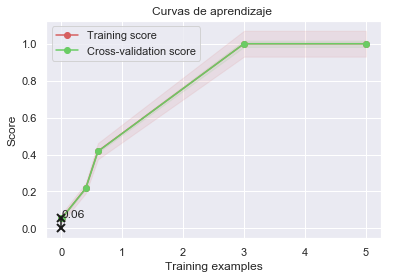

In [84]:
from sklearn.linear_model import Lasso

cvres_ridLasso = grid_search_ridLasso.cv_results_    
testscores_mean_ridLasso =abs(cvres_ridLasso["mean_test_score"])
testscores_sd_ridLasso = abs(cvres_ridLasso['std_test_score'])

trainscores_mean_ridLasso =abs(cvres_ridLasso['mean_train_score'])
trainscores_sd_ridLasso = abs(cvres_ridLasso[ 'std_train_score'])



X_axis_ridLasso = np.array(cvres_ridLasso['param_alpha'].data, dtype=float)
plt.fill_between(X_axis_ridLasso, testscores_mean_ridLasso - testscores_sd_ridLasso,
                        testscores_mean_ridLasso + testscores_sd_ridLasso,alpha=0.1,color="r")    
plt.plot(X_axis_ridLasso, testscores_mean_ridLasso, 'o-', color="r",
         label="Training score")

plt.fill_between(X_axis_ridLasso, trainscores_mean_ridLasso - trainscores_sd_ridLasso,
                 trainscores_mean_ridLasso + trainscores_sd_ridLasso, alpha=0.1, color="g")

plt.plot(X_axis_ridLasso, trainscores_mean_ridLasso, 'o-', color="g",
         label="Cross-validation score")

X_best_params_ridLasso=grid_search_ridLasso.best_params_
X_alpha_ridLasso = cvres_ridLasso['param_alpha'].data

plt.plot([X_best_params_ridLasso.get("alpha"), ] * 2, [0, abs(testscores_mean_ridLasso[np.where(X_alpha_ridLasso == X_best_params_ridLasso.get("alpha"))])],
         linestyle='-.', color='k', marker='x', markeredgewidth=2, ms=8)

plt.annotate("%0.2f" % abs(testscores_mean_ridLasso[np.where(X_alpha_ridLasso == X_best_params_ridLasso.get("alpha"))]),
             (X_best_params_ridLasso.get("alpha"), abs(testscores_mean_ridLasso[np.where(X_alpha_ridLasso == X_best_params_ridLasso.get("alpha"))]+ 0.005)))

plt.legend(loc="best") 


plt.grid()
plt.legend(loc="best") 
title = "Curvas de aprendizaje "
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")

In [85]:
grid_search_ridLasso.best_params_

{'alpha': 0.001}

In [86]:
grid_search_ridLasso.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
for mean_score, params in zip(cvres_ridLasso["mean_test_score"], cvres_ridLasso["params"]):
    print(np.sqrt(-mean_score), params)

0.23605991766908282 {'alpha': 0.001}
0.23804942134661464 {'alpha': 0.01}
0.465981497192514 {'alpha': 0.4}
0.6463637080115309 {'alpha': 0.6}
1.0000953195115776 {'alpha': 3}
1.0000953195115776 {'alpha': 5}


# Elastic Net
La red elástica está en algún lugar entre la regresión de la cresta y la regresión del lazo

In [88]:
from sklearn.linear_model import ElasticNet

alpha = np.array([0.0001,0.1,10])
l1_ratio = np.array([3,5,10])

param_grid_ElasticNet= [
    # try 12 (3×4) combinations of hyperparameters
    {"alpha": alpha,"l1_ratio": l1_ratio}
  ]


ridElastic = ElasticNet(alpha = 0.1, l1_ratio =0.1)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_ridElastic = GridSearchCV(ridElastic, param_grid_ElasticNet, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_ridElastic.fit(fifa_num_tr, fifa_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([1.e-04, 1.e-01, 1.e+01]), 'l1_ratio': array([ 3,  5, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Text(5, [[0.06067704]], '0.0557')

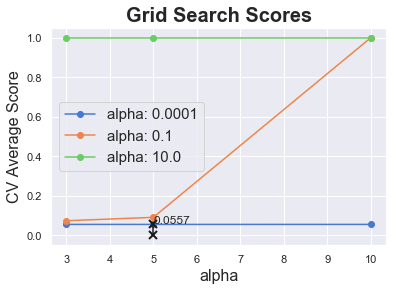

In [89]:
cvres_ridElastic = grid_search_ridElastic.cv_results_ 

X_best_params_ridElastic=grid_search_ridElastic.best_params_
testscores_mean_ridElastic = abs(cvres_ridElastic["mean_test_score"])
testscores_mean_ridElastic = np.array(testscores_mean_ridElastic).reshape(len(l1_ratio),len(alpha))

testscores_sd_ridElastic  =  abs(cvres_ridElastic['std_test_score'])
testscores_sd_ridElastic = np.array(testscores_sd_ridElastic).reshape(len(l1_ratio),len(alpha))

# Plot Grid search scores
_, ax = plt.subplots(1,1)

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)"l1_ratio" "alpha"
for idx, val in enumerate(alpha):
    ax.plot(l1_ratio, testscores_mean_ridElastic[idx,:], '-o', label= 'alpha' + ': ' + str(val)) 

ax.plot([X_best_params_ridElastic.get("l1_ratio"), ] * 2, [0, abs(testscores_mean_ridElastic[np.where(alpha == X_best_params_ridElastic.get("alpha")),np.where(l1_ratio == X_best_params_ridElastic.get("l1_ratio"))])],
        linestyle='-.', color='k', marker='x', markeredgewidth=2, ms=8)  
ax.grid()
ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel('alpha', fontsize=16)
ax.set_ylabel('CV Average Score', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.annotate("%0.4f" % abs(testscores_mean_ridElastic[np.where(alpha == X_best_params_ridElastic.get("alpha")),np.where(l1_ratio == X_best_params_ridElastic.get("l1_ratio"))]),
             (X_best_params_ridElastic.get("l1_ratio"), abs(testscores_mean_ridElastic[np.where(alpha == X_best_params_ridElastic.get("alpha")),np.where(l1_ratio == X_best_params_ridElastic.get("l1_ratio"))] + 0.005)))

In [90]:
grid_search_ridElastic.best_params_

{'alpha': 0.0001, 'l1_ratio': 5}

In [91]:
grid_search_ridElastic.best_estimator_

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
for mean_score, params in zip(cvres_ridElastic["mean_test_score"],cvres_ridElastic["params"]):
    print(np.sqrt(-mean_score), params)  

0.23598642443638146 {'alpha': 0.0001, 'l1_ratio': 3}
0.2359598252348192 {'alpha': 0.0001, 'l1_ratio': 5}
0.23602157602264295 {'alpha': 0.0001, 'l1_ratio': 10}
0.2726048941284262 {'alpha': 0.1, 'l1_ratio': 3}
0.30245690600554864 {'alpha': 0.1, 'l1_ratio': 5}
1.0000953195115776 {'alpha': 0.1, 'l1_ratio': 10}
1.0000953195115776 {'alpha': 10.0, 'l1_ratio': 3}
1.0000953195115776 {'alpha': 10.0, 'l1_ratio': 5}
1.0000953195115776 {'alpha': 10.0, 'l1_ratio': 10}


# KernelRidge rbf

combina Kernel ridge regression(mínimos cuadrados lineales con la regularización de la norma l2) con el truco del kernel. Así aprende una función lineal en el espacio inducido por el kernel respectivo y los datos. Para los núcleos no lineales, esto corresponde a una función no lineal en el espacio original.

Nota: al tener tantos dato el proceso podría tardar un tiempo considerable si no se paraleliza 

In [93]:
from sklearn.kernel_ridge import KernelRidge

gamma = np.array([0.01,0.1,1,1.1])
param_grid_kernel = [ {"gamma": gamma}]

grid_search_KernelRidge= GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),param_grid_kernel, cv=5,
                                         scoring='neg_mean_squared_error', return_train_score=True)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_KernelRidge.fit(fifa_num_tr[:6500,:], fifa_labels[:6500])


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=0.1, kernel='rbf',
      kernel_params=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': array([0.01, 0.1 , 1.  , 1.1 ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

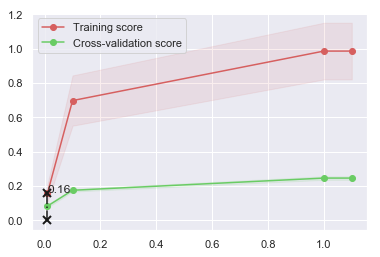

In [94]:
cvres_KernelRidge = grid_search_KernelRidge.cv_results_     
testscores_mean_KernelRidge =abs(cvres_KernelRidge["mean_test_score"])
testscores_sd_KernelRidge = abs(cvres_KernelRidge['std_test_score'])

trainscores_mean_KernelRidge =abs(cvres_KernelRidge['mean_train_score'])
trainscores_sd_KernelRidge = abs(cvres_KernelRidge[ 'std_train_score'])



X_axis_KernelRidge = np.array(cvres_KernelRidge['param_gamma'].data, dtype=float)
plt.fill_between(X_axis_KernelRidge, testscores_mean_KernelRidge - testscores_sd_KernelRidge,
                        testscores_mean_KernelRidge + testscores_sd_KernelRidge,alpha=0.1,color="r")    
plt.plot(X_axis_KernelRidge, testscores_mean_KernelRidge, 'o-', color="r",
         label="Training score")

plt.fill_between(X_axis_KernelRidge, trainscores_mean_KernelRidge - trainscores_sd_KernelRidge,
                 trainscores_mean_KernelRidge + trainscores_sd_KernelRidge, alpha=0.1, color="g")

plt.plot(X_axis_KernelRidge, trainscores_mean_KernelRidge, 'o-', color="g",
         label="Cross-validation score")

X_best_params_KernelRidge=grid_search_KernelRidge.best_params_
X_alpha_KernelRidge = cvres_KernelRidge['param_gamma'].data

plt.plot([X_best_params_KernelRidge.get("gamma"), ] * 2, [0, abs(testscores_mean_KernelRidge[np.where(X_alpha_KernelRidge == X_best_params_KernelRidge.get("gamma"))])],
         linestyle='-.', color='k', marker='x', markeredgewidth=2, ms=8)

plt.annotate("%0.2f" % abs(testscores_mean_KernelRidge[np.where(X_alpha_KernelRidge == X_best_params_KernelRidge.get("gamma"))]),
             (X_best_params_KernelRidge.get("gamma"), abs(testscores_mean_KernelRidge[np.where(X_alpha_KernelRidge == X_best_params_KernelRidge.get("gamma"))]+ 0.005)))

plt.legend(loc="best") 
plt.grid()

In [95]:
grid_search_KernelRidge.best_params_

{'gamma': 0.01}

In [96]:
grid_search_KernelRidge.best_estimator_

KernelRidge(alpha=1, coef0=1, degree=3, gamma=0.01, kernel='rbf',
      kernel_params=None)

In [97]:
for mean_score, params in zip(cvres_KernelRidge["mean_test_score"],cvres_KernelRidge["params"]):
    print(np.sqrt(-mean_score), params)

0.3966109084239699 {'gamma': 0.01}
0.8353579125543041 {'gamma': 0.1}
0.9929602768706081 {'gamma': 1.0}
0.9929820330604799 {'gamma': 1.1}


# Kernel Ridge linear

combina Kernel ridge regression(mínimos cuadrados lineales con la regularización de la norma l2) con el truco del kernel. Así aprende una función lineal en el espacio inducido por el kernel respectivo y los datos. Para los núcleos no lineales, esto corresponde a una función no lineal en el espacio original.

In [98]:
from sklearn.kernel_ridge import KernelRidge
ridKernelRidge_l =KernelRidge(kernel='linear')
ridKernelRidge_l.fit(fifa_num_tr[:6500,:],fifa_labels[:6500])

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [99]:
KernelRidge_l = cross_val_score(ridKernelRidge_l , fifa_num_tr[:6500,:],fifa_labels[:6500],
                         scoring="neg_mean_squared_error", cv=5) #scikitlearn trabaja con función util (mayor mejor) no función de costo (menor mejor)
tree_rmse_scores_KernelRidge_l = np.sqrt(-KernelRidge_l)


In [100]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores_KernelRidge_l)

Scores: [0.2365449  0.24547635 0.38437489 0.18913541 0.23255365]
Mean: 0.2576170393277092
Standard deviation: 0.06629764811712764


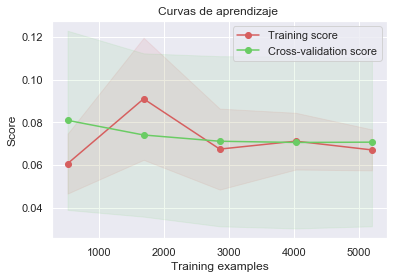

In [101]:
title = "Curvas de aprendizaje "
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")

    
train_sizes_KernelRidge_l, train_scores_KernelRidge_l, test_scores_KernelRidge_l = \
    learning_curve(ridKernelRidge_l, fifa_num_tr[:6500,:],fifa_labels[:6500],
                   scoring="neg_mean_squared_error", cv=5)

train_scores_mean_KernelRidge_l = abs(np.mean(train_scores_KernelRidge_l, axis=1))
train_scores_std_KernelRidge_l = abs(np.std(train_scores_KernelRidge_l, axis=1))
test_scores_mean_KernelRidge_l = abs(np.mean(test_scores_KernelRidge_l, axis=1))
test_scores_std_KernelRidge_l = abs(np.std(test_scores_KernelRidge_l, axis=1))
plt.grid()
plt.fill_between(train_sizes_KernelRidge_l, train_scores_mean_KernelRidge_l - train_scores_std_KernelRidge_l,
                 train_scores_mean_KernelRidge_l + train_scores_std_KernelRidge_l, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_KernelRidge_l, test_scores_mean_KernelRidge_l - test_scores_std_KernelRidge_l,
                 test_scores_mean_KernelRidge_l + test_scores_std_KernelRidge_l, alpha=0.1, color="g")

plt.plot(train_sizes_KernelRidge_l, train_scores_mean_KernelRidge_l, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_KernelRidge_l, test_scores_mean_KernelRidge_l, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best") 



# Bayesian Ridge Regression

estima un modelo probabilístico del problema de regresión como se describe anteriormente. El previo para el coeficiente. w Es dado por un gaussiano esférico

In [102]:
from sklearn.linear_model import BayesianRidge

ridBayesianRidge =BayesianRidge(compute_score=True)
ridBayesianRidge.fit(fifa_num_tr,fifa_labels)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [103]:
BayesianRidge = cross_val_score(ridBayesianRidge , fifa_num_tr,fifa_labels,
                         scoring="neg_mean_squared_error", cv=5) #scikitlearn trabaja con función util (mayor mejor) no función de costo (menor mejor)
tree_rmse_scores_BayesianRidge = np.sqrt(-BayesianRidge)

In [104]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores_BayesianRidge)

Scores: [0.32032509 0.18157078 0.22427453 0.2176879  0.21305591]
Mean: 0.23138284183815688
Standard deviation: 0.046831445498139994


Text(0.5, 0, 'Iterations')

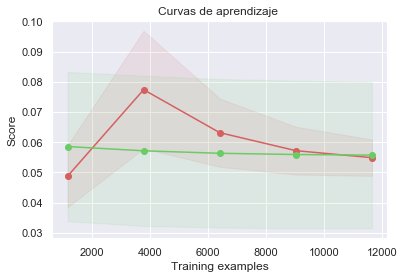

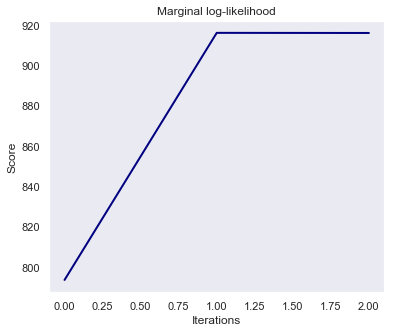

In [105]:
title = "Curvas de aprendizaje "
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
    
train_sizes_BayesianRidge, train_scores_BayesianRidge, test_scores_BayesianRidge = \
    learning_curve(ridBayesianRidge, fifa_num_tr,fifa_labels,
                   scoring="neg_mean_squared_error", cv=5)

train_scores_mean_BayesianRidge =abs( np.mean(train_scores_BayesianRidge, axis=1))
train_scores_std_BayesianRidge = abs(np.std(train_scores_BayesianRidge, axis=1))
test_scores_mean_BayesianRidge = abs(np.mean(test_scores_BayesianRidge, axis=1))
test_scores_std_BayesianRidge = abs(np.std(test_scores_BayesianRidge, axis=1))
plt.grid()
plt.fill_between(train_sizes_BayesianRidge, train_scores_mean_BayesianRidge - train_scores_std_BayesianRidge,
                 train_scores_mean_BayesianRidge + train_scores_std_BayesianRidge, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_BayesianRidge, test_scores_mean_BayesianRidge - test_scores_std_BayesianRidge,
                 test_scores_mean_BayesianRidge + test_scores_std_BayesianRidge, alpha=0.1, color="g")

plt.plot(train_sizes_BayesianRidge, train_scores_mean_BayesianRidge, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_BayesianRidge, test_scores_mean_BayesianRidge, 'o-', color="g",
         label="Cross-validation score")



plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(ridBayesianRidge.scores_, color='navy', linewidth=2)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Automatic Relevance Determination Regression (ARD)

Ajuste los pesos de un modelo de regresión, utilizando un ARD anterior. Se asume que los pesos del modelo de regresión están en distribuciones gaussianas. También estimar los parámetros lambda (precisiones de las distribuciones de los pesos) y alfa (precisión de la distribución del ruido). La estimación se realiza mediante un procedimiento iterativo (Maximización de la evidencia).

In [106]:
from sklearn.linear_model import ARDRegression

threshold_lambda = np.array([0.001,10,12,15])
param_grid_ARD = [ {"threshold_lambda": threshold_lambda}]

grid_search_ARD= GridSearchCV(ARDRegression(threshold_lambda=1e5),param_grid_ARD, cv=5,
                                         scoring='neg_mean_squared_error', return_train_score=True)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_ARD.fit(fifa_num_tr[:2500,:],fifa_labels[:2500])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=100000.0, tol=0.001,
       verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'threshold_lambda': array([1.0e-03, 1.0e+01, 1.2e+01, 1.5e+01])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Text(0, 0.5, 'Score')

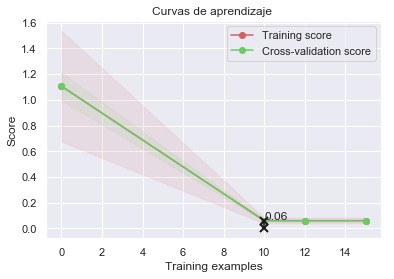

In [107]:

cvres_ARD = grid_search_ARD.cv_results_    
testscores_mean_ARD =abs(cvres_ARD["mean_test_score"])
testscores_sd_ARD = abs(cvres_ARD['std_test_score'])

trainscores_mean_ARD =abs(cvres_ARD['mean_train_score'])
trainscores_sd_ARD = abs(cvres_ARD[ 'std_train_score'])

X_axis_ARD= np.array(cvres_ARD['param_threshold_lambda'].data, dtype=float)
plt.fill_between(X_axis_ARD, testscores_mean_ARD- testscores_sd_ARD,
                        testscores_mean_ARD + testscores_sd_ARD,alpha=0.1,color="r")    

plt.plot(X_axis_ARD, testscores_mean_ARD, 'o-', color="r",label="Training score")

plt.fill_between(X_axis_ARD, trainscores_mean_ARD - trainscores_sd_ARD,
                 trainscores_mean_ARD + trainscores_sd_ARD, alpha=0.1, color="g")

plt.plot(X_axis_ARD, trainscores_mean_ARD, 'o-', color="g",
         label="Cross-validation score")

X_best_params_ARD=grid_search_ARD.best_params_
X_alpha_ARD = cvres_ARD['param_threshold_lambda'].data

plt.plot([X_best_params_ARD.get('threshold_lambda'), ] * 2, [0, abs(testscores_mean_ARD[np.where(X_alpha_ARD == X_best_params_ARD.get('threshold_lambda'))])],
         linestyle='-.', color='k', marker='x', markeredgewidth=2, ms=8)

plt.annotate("%0.2f" % abs(testscores_mean_ARD[np.where(X_alpha_ARD== X_best_params_ARD.get('threshold_lambda'))]),
             (X_best_params_ARD.get('threshold_lambda'), abs(testscores_mean_ARD[np.where(X_alpha_ARD == X_best_params_ARD.get('threshold_lambda'))]+ 0.005)))

plt.legend(loc="best") 
plt.grid()
plt.legend(loc="best") 
title = "Curvas de aprendizaje "
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")


In [108]:
grid_search_ARD.best_params_

{'threshold_lambda': 10.0}

In [109]:
for mean_score, params in zip(cvres_ARD["mean_test_score"],cvres_ARD["params"]):
    print(np.sqrt(-mean_score), params)

1.051682591470793 {'threshold_lambda': 0.001}
0.24616917004794892 {'threshold_lambda': 10.0}
0.24616917004794892 {'threshold_lambda': 12.0}
0.24616917004794892 {'threshold_lambda': 15.0}


Pesos del modelo ARD vs Bayesian Ridge Regression

# Random Forest Regressor

Es un estimador que se ajusta a una serie de árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y el ajuste excesivo del control. El tamaño de la sub-muestra es siempre el mismo que el tamaño de la muestra de entrada original, pero las muestras se extraen con reemplazo si bootstrap = True (predeterminado).

In [111]:
from sklearn.ensemble import RandomForestRegressor

n_estimators= np.array([3,10,30])
max_features = np.array([2, 4, 6])


param_grid = [{'n_estimators': n_estimators, 'max_features': max_features}]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest_reg = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_forest_reg.fit(fifa_num_tr,fifa_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': array([ 3, 10, 30]), 'max_features': array([2, 4, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

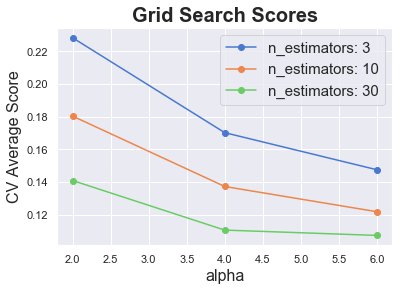

In [112]:
cvres_forest_reg =grid_search_forest_reg.cv_results_ 
X_axis_forest_reg  = np.array(cvres_forest_reg ['param_n_estimators'].data, dtype=float)
X_best_params_forest_reg =grid_search_ridElastic.best_params_
testscores_mean_forest_reg  = abs(cvres_forest_reg ["mean_test_score"])
testscores_mean_forest_reg  = np.array(testscores_mean_forest_reg ).reshape(len(max_features),len(n_estimators))

testscores_sd_forest_reg   =  abs(cvres_forest_reg ['std_test_score'])
testscores_sd_forest_reg  = np.array(testscores_sd_forest_reg ).reshape(len(max_features),len(n_estimators))

# Plot Grid search scores
_, ax = plt.subplots(1,1)

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)"l1_ratio" "alpha"
for idx, val in enumerate(n_estimators):
    ax.plot(max_features, testscores_mean_forest_reg [idx,:], '-o', label= 'n_estimators' + ': ' + str(val)) 

ax.grid()
ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel('alpha', fontsize=16)
ax.set_ylabel('CV Average Score', fontsize=16)
ax.legend(loc="best", fontsize=15)


In [113]:
grid_search_forest_reg.best_params_

{'max_features': 6, 'n_estimators': 30}

In [114]:
grid_search_forest_reg.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [115]:
for mean_score, params in zip(cvres_forest_reg["mean_test_score"],cvres_forest_reg["params"]):
    print(np.sqrt(-mean_score), params)

0.4779118053527306 {'max_features': 2, 'n_estimators': 3}
0.4126489895801263 {'max_features': 2, 'n_estimators': 10}
0.3841452243831786 {'max_features': 2, 'n_estimators': 30}
0.4247672035102219 {'max_features': 4, 'n_estimators': 3}
0.3705689880023459 {'max_features': 4, 'n_estimators': 10}
0.34909826554039736 {'max_features': 4, 'n_estimators': 30}
0.3754625470042866 {'max_features': 6, 'n_estimators': 3}
0.3326018262738936 {'max_features': 6, 'n_estimators': 10}
0.32766025838566937 {'max_features': 6, 'n_estimators': 30}


# Seleccionar un modelo Sintonizado con los mejores parámetros


In [116]:

#linear regression
test_rmse_scores_lin_reg = np.sqrt(test_scores_mean_lin_reg )
#Regresión de Ridge
test_score_ridgeReg=np.array([abs(cvres_ridgeReg['split0_test_score']),abs(cvres_ridgeReg['split1_test_score']),
                              abs(cvres_ridgeReg['split2_test_score']),abs(cvres_ridgeReg['split3_test_score']),
                              abs(cvres_ridgeReg['split4_test_score'])])
params_optimo_ridgeReg=np.where(X_alpha_ridgeReg == X_best_params_ridgeReg.get("alpha"))
test_rmse_scores_ridgeReg=np.sqrt(test_score_ridgeReg[0:,np.int(params_optimo_ridgeReg[-1])])

#Regresión de Lasso
test_score_Lasso=np.array([abs(cvres_ridLasso['split0_test_score']),abs(cvres_ridLasso['split1_test_score']),
                           abs(cvres_ridLasso['split2_test_score']),abs(cvres_ridLasso['split3_test_score']),
                           abs(cvres_ridLasso['split4_test_score'])])
params_optimo_Lassog=np.where(X_alpha_ridLasso == X_best_params_ridLasso.get("alpha"))
test_rmse_scores_Lassog=np.sqrt(test_score_Lasso[0:,np.int(params_optimo_Lassog[-1])])

#Regresión de Elastic
test_score_Elastic=np.array([abs(cvres_ridElastic['split0_test_score']),abs(cvres_ridElastic['split1_test_score']),
                             abs(cvres_ridElastic['split2_test_score']),abs(cvres_ridElastic['split3_test_score']),
                             abs(cvres_ridElastic['split4_test_score'])])



params_optimo_Elastic=np.where(np.array(cvres_ridElastic['params'])==grid_search_ridElastic.best_params_)
test_rmse_scores_Elastic=np.sqrt(test_score_Elastic[0:,np.int(params_optimo_Elastic[-1])])

#KernelRidge rbf
test_score_KernelRidg=np.array([abs(cvres_KernelRidge['split0_test_score']),abs(cvres_KernelRidge['split1_test_score']),
                                abs(cvres_KernelRidge['split2_test_score']),abs(cvres_KernelRidge['split3_test_score']),
                                abs(cvres_KernelRidge['split4_test_score'])])
params_optimo_KernelRidg=np.where(X_alpha_KernelRidge == X_best_params_KernelRidge.get("gamma"))
test_rmse_scores_KernelRidg=np.sqrt(test_score_KernelRidg[0:,np.int(params_optimo_KernelRidg[-1])])

#Kernel Ridge linear
test_rmse_scores_KernelRidge_l = np.sqrt(test_scores_mean_KernelRidge_l )

#Bayesian Ridge Regression
test_rmse_BayesianRidge=np.sqrt(test_scores_mean_BayesianRidge)


#Automatic Relevance Determination Regression (ARD)

test_score_ARD=np.array([abs(cvres_ARD['split0_test_score']),abs(cvres_ARD['split1_test_score']),
                         abs(cvres_ARD['split2_test_score']),abs(cvres_ARD['split3_test_score']),
                         abs(cvres_ARD['split4_test_score'])])

params_optimo_ARD=np.where(X_alpha_ARD == X_best_params_ARD.get('threshold_lambda'))
test_rmse_scores_ARD=np.sqrt(test_score_ARD[0:,np.int(params_optimo_ARD[-1])])


#Random Forest Regressor

test_score_forest_reg=np.array([abs(cvres_forest_reg['split0_test_score']),abs(cvres_forest_reg['split1_test_score']),
                                abs(cvres_forest_reg['split2_test_score']),abs(cvres_forest_reg['split3_test_score']),
                                abs(cvres_forest_reg['split4_test_score'])])
params_optimo_forest_reg=np.where(np.array(cvres_forest_reg['params'])==grid_search_forest_reg.best_params_)
test_rmse_scores_forest_reg=np.sqrt(test_score_forest_reg[0:,np.int(params_optimo_forest_reg[-1])])



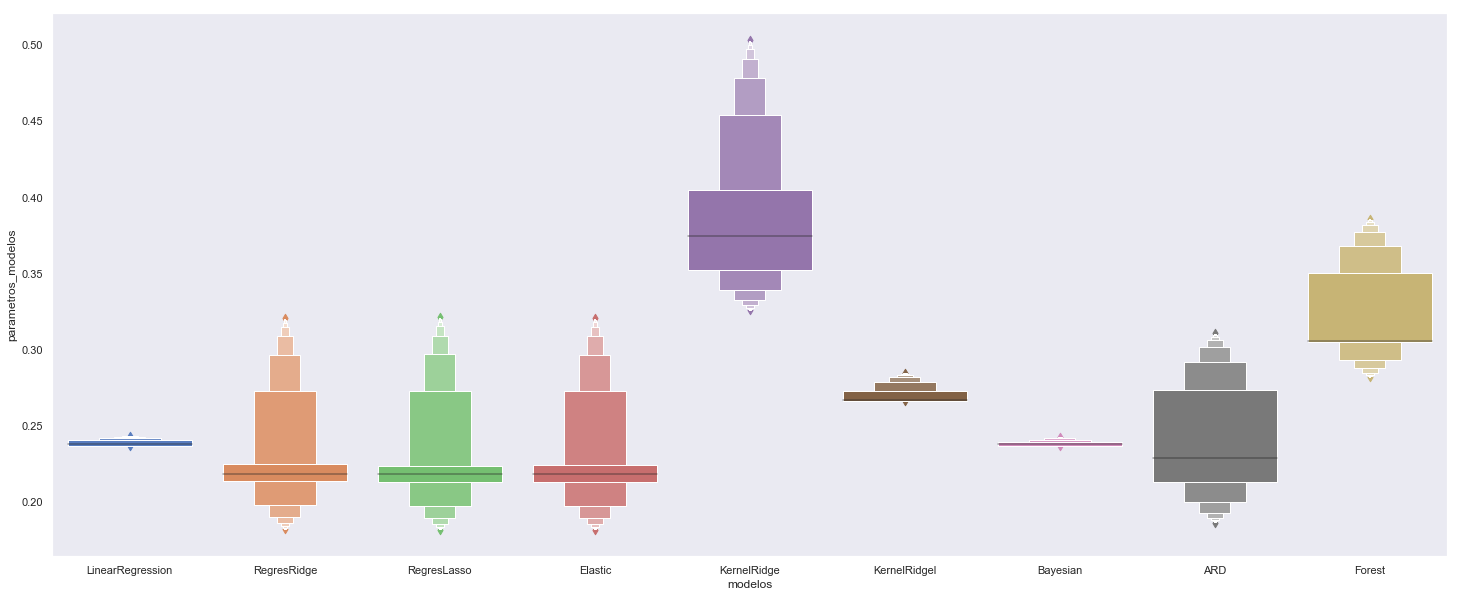

In [117]:
# Función que convierte los datos en el factor de euros
def modelos_name(name):
    # Convert M in value column to millions
    if name == 1.0:
        return 'LinearRegression'
    if name == 2.0:
        return 'RegresRidge'
    if name == 3.0:
        return 'RegresLasso'
    if name == 4.0:
        return 'Elastic'
    if name == 5.0:
        return 'KernelRidge'
    if name == 6.0:
        return 'KernelRidgel'
    if name == 7.0:
        return 'Bayesian'
    if name == 8.0:
        return 'ARD'
    if name == 9.0:
        return 'Forest'


#modelos
modelos=np.array([[np.ones(len(test_rmse_scores_lin_reg))], [np.ones(len(test_rmse_scores_ridgeReg))*2], 
                  [np.ones(len(test_rmse_scores_Lassog))*3],[np.ones(len(test_rmse_scores_Elastic))*4],
                  [np.ones(len(test_rmse_scores_KernelRidg))*5],[np.ones(len(test_rmse_scores_KernelRidge_l))*6],
                  [np.ones(len(test_rmse_scores_ARD))*7],[np.ones(len(test_rmse_scores_ARD))*8],
                  [np.ones(len(test_rmse_scores_forest_reg))*9]
                 ])

modelos=np.reshape(modelos,45)
parametros_modelos=np.array([[test_rmse_scores_lin_reg], [test_rmse_scores_ridgeReg], 
                             [test_rmse_scores_Lassog], [test_rmse_scores_Elastic],
                             [test_rmse_scores_KernelRidg],[test_rmse_scores_KernelRidge_l],
                             [test_rmse_BayesianRidge],[test_rmse_scores_ARD],
                             [test_rmse_scores_forest_reg]
                            ])
parametros_modelos=np.reshape(parametros_modelos, 45)

rultados_de_test_train= {'modelos': pd.Series(modelos),                         
                         'parametros_modelos': pd.Series(parametros_modelos)}
                                                         

rultados_de_test_train_table = pd.DataFrame(rultados_de_test_train)
rultados_de_test_train_table['modelos']= rultados_de_test_train_table['modelos'].apply(lambda x:  modelos_name(x) )

plt.figure(figsize=(25,10))
sns.boxenplot(rultados_de_test_train_table['modelos'],rultados_de_test_train_table['parametros_modelos'])

Como lo podemos ver el óptimo de los parámetros es el Automatic Relevance Determination Regression teniendo en cuenta que solo se probo con unos pocos datos pudo estimar el modelo con facilidad de tal forma que cuantifico la incertidumbre con pocos datos todos los modelos comparados haca estaban con sus parámetros óptimos es decir que lo que vemos es la media y la incertidumbre de los datos al entrar y validad 5 bese 

# Modelo final evolución

In [119]:
# Drop unused columns test
columns_to_drop = ['Name', 'Nationality', 'Club', 'Preferred Foot','Work Rate Attack', 
                   'Work Rate Defence', 'Contract Valid Until','Position','Body Type','Release Clause']

fifa_test= strat_test_set.drop(columns_to_drop, axis=1)

from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan,strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()), #MinMaxScaler StandardScaler
    ])

fifa_num_test=num_pipeline.fit_transform(fifa_test)


y_test = strat_test_set['Release Clause'].copy()
median =y_test.median()
y_test.fillna(median, inplace=True) # optio
y_test=stats.zscore(y_test)




In [120]:

from sklearn.metrics import mean_squared_error

final_model =ridBayesianRidge
final_predictions = final_model.predict(fifa_num_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [121]:
final_rmse

0.26988911797592063

El intervalo de confianza al 95% se puede calcular para el RMSE sobre el conjunto de test:

In [122]:
from scipy import stats

In [123]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
sigma = squared_errors.std()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors))) #https://es.wikipedia.org/wiki/Error_est%C3%A1ndar#Error_est%C3%A1ndar_de_la_media

array([0.1204003 , 0.36219337])

In [124]:
#linear regression
mulin, sigma = mean,sigma
test_scores_linreg= np.random.normal(mulin_reg, sigmalin_reg, 10)

test_rmse_BayesianRidge=np.sqrt(test_scores_mean_BayesianRidge)

# Función que convierte los datos en el factor de euros
def modelos_name(name):
    # Convert M in value column to millions
    if name == 1.0:
        return 'intervalodeconfianzaal95%'


np.random.seed(42)
#modelos
modelos=np.array([[np.ones(len(test_scores_linreg))]])
modelos=np.reshape(modelos,10)
parametros_modelos=np.array([[test_scores_linreg]])
parametros_modelos=np.reshape(parametros_modelos, 10)

rultados_de_test_train= {'modelos': pd.Series(modelos),                         
                         'parametros_modelos': pd.Series(parametros_modelos)}
                                                         

rultados_de_test_train_table = pd.DataFrame(rultados_de_test_train)
rultados_de_test_train_table['modelos']= rultados_de_test_train_table['modelos'].apply(lambda x:  modelos_name(x) )

plt.figure(figsize=(3,10))
sns.boxplot(rultados_de_test_train_table['modelos'],rultados_de_test_train_table['parametros_modelos'])

NameError: name 'mulin_reg' is not defined

# Material extra

In [ ]:
sizes = np.around(np.logspace(2, 3.5, 7))
sizes =sizes.astype(int)

from sklearn.svm import SVR
import time
for name, estimator in {"KRR": KernelRidge(kernel='rbf',gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(fifa_num_tr[:train_test_size], fifa_labels[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(fifa_num_test[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)
    
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")